In [6]:
import networkx as nx
import pysbm
import matplotlib.pylab as pl
from Utils import DC_BM
import OtrisymNMF
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as NMI
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

In [7]:
G = nx.davis_southern_women_graph()
# Séparer les nœuds par bipartition
women = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
events = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]


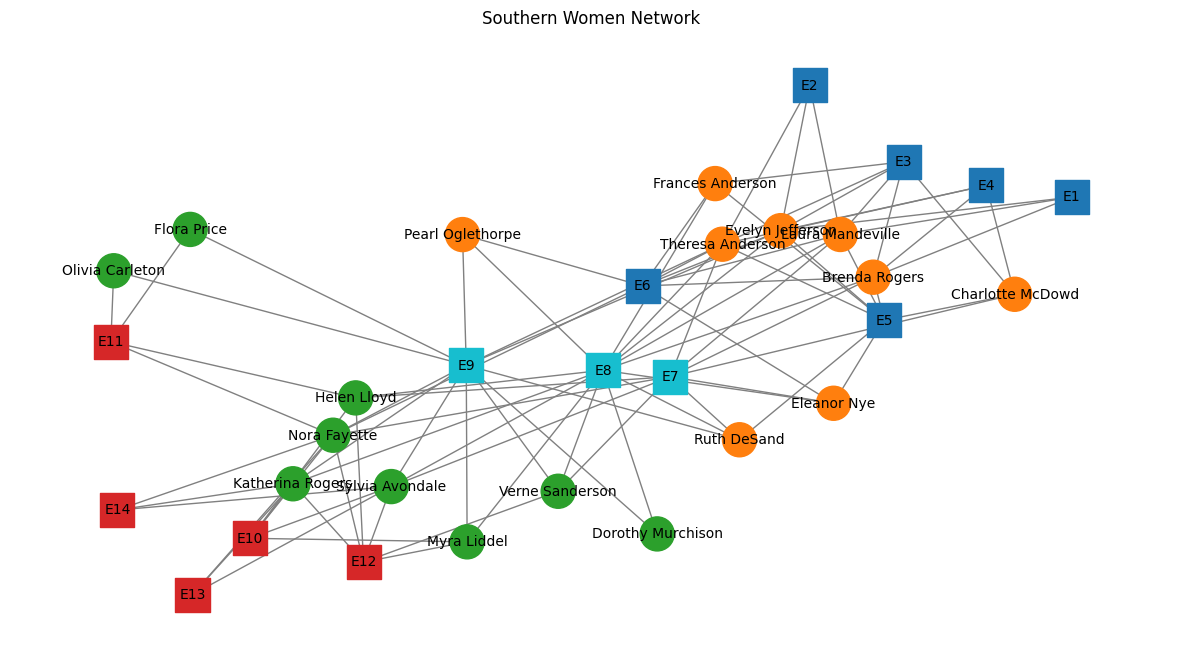

In [36]:
X = nx.adjacency_matrix(G)
w, v, S, error = OtrisymNMF.OtrisymNMF_CD(X,5,numTrials=10,verbosity=0)
# Définir les couleurs selon les labels de v
import matplotlib.colors as mcolors
# Générer le layout à ressorts
pos = nx.spring_layout(G, seed=12)

# Palette de couleurs (5 couleurs)
colors = list(mcolors.TABLEAU_COLORS.values())

# Associer les couleurs via l'index dans v
node_list = list(G.nodes())  # Ordre des nœuds
node_colors = [colors[v[i]-1] for i in range(len(node_list))]
plt.figure(figsize=(15,8))  # 👈 Ici on agrandit la figure

# Tracer les femmes (cercles)
nx.draw_networkx_nodes(G, pos,
                       nodelist=women,
                       node_color=[node_colors[node_list.index(n)] for n in women],
                       node_shape='o',
                       node_size=600)

# Tracer les événements (carrés)
nx.draw_networkx_nodes(G, pos,
                       nodelist=events,
                       node_color=[node_colors[node_list.index(n)] for n in events],
                       node_shape='s',
                       node_size=600)

# Tracer les arêtes
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Ajouter les labels
nx.draw_networkx_labels(G, pos, font_size=10)


# Afficher le graphe
plt.title("Southern Women Network")
plt.axis('off')
plt.show()